# Neural Networks - Optimizers

This collab notebook is an intorduction to optimizers usually used for neural networks.

The equations for optimizers and more: https://ruder.io/optimizing-gradient-descent/ <br>
More beautiful visualizations of optimizers: https://github.com/Jaewan-Yun/optimizer-visualization

This notebook introduces to gradient descent technique.

In [0]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import value_and_grad
from scipy.optimize import minimize

In [0]:
# some helper functions for plotting
def plot_animate2d(path, label = 'Gradient Descend'):
    
    """Function to plot the animation of gradient descend
        path: calculated gradined updates
        label: name of algorotihm
    
    """
    fig, ax = plt.subplots(figsize=(8, 4))

    # countour plot
    ax.contour(x, y, z, levels=np.logspace(0, 5, 100), norm=LogNorm(), cmap=plt.cm.jet)
    # minima point plot
    ax.plot(*minima_, 'r*', markersize=12)

    # empty lists for gradient descend path
    line, = ax.plot([], [], 'r', label=label, lw=2)
    point, = ax.plot([], [], 'ro')

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))

    ax.legend(loc='upper left')
    plt.show()
    
    def init():
        line.set_data([], [])
        point.set_data([], [])
        return line, point

    def animate(i):
        line.set_data(*path[::,:i])
        point.set_data(*path[::,i-1:i])
        return line, point
    
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=path.shape[1], interval=120, 
                                   repeat_delay=5, blit=True)
    return anim

    

Let's make some plots for the following function:
$$f(x,y)=5(1.5-x+xy)^2+(2.25-x+xy^2)^2+5(2.625-x+xy^3)^2$$

In [0]:
# define the function and gradient
f  = lambda x, y: 5*(1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + 5*(2.625 - x + x*y**3)**2
f_x = lambda x, y: 10*(-1+y)*(1.5 - x + x*y)+2*(-1+y**2)*(2.25 - x + x*y**2) + 10*(-1+y**3)*(2.625 - x + x*y**3)
f_y = lambda x, y: 10*(x)*(1.5 - x + x*y)+2*(2*y)*(2.25 - x + x*y**2) + 10*(3*y**2)*(2.625 - x + x*y**3)

In [0]:
# define meshgrid boundaries and steps
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = f(x, y)

In [0]:
# find the minimum point
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)

In [0]:
def gradient_descend(x0 = np.array([-0.2,0.8]), learning_rate = 0.01, num_iter = 40):
    
    """Vanilla gradient Descend
        x0: initial point
        learning_rate: learning rate of gradient descend
        num_iter: number of iterations
        
    return: return the calcualted gradinets path"""

    func = value_and_grad(lambda args: f(*args))
    # initialize path for gradient descent
    path = [x0]
    
    # main loop
    for _ in range(num_iter):
        x0 = x0 - [learning_rate*f_x(*x0),learning_rate*f_y(*x0)]
        path.append(x0)
        
    return np.array(path).T

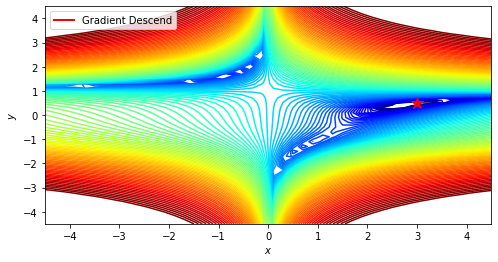

In [7]:
starting_point = np.array([-0.2,0.3])
learning_rate = 0.02
iterations = 40

path = gradient_descend(x0 = starting_point, learning_rate=learning_rate, num_iter = iterations)
animated = plot_animate2d(path)
HTML(animated.to_html5_video())

In [0]:
def gradient_descend_momentum(x0 = np.array([-0.2,0.8]), learning_rate = 0.01, num_iter = 40, momentum = 0.9):
    
    """Momentum gradient Descend
        x0: initial point
        learning_rate: learning rate of gradient descend
        num_iter: number of iterations
        momentum: the strength of momentum
        
    return: return the calcualted gradinets path"""

    func = value_and_grad(lambda args: f(*args))
    # initialize path for gradient descent
    path = [x0]
    momentum_path = [np.array([0,0])]
    
    # main loop
    for i in range(num_iter):
        v = learning_rate*np.array([f_x(*x0),f_y(*x0)]) + momentum*np.array(momentum_path[i])
        momentum_path.append(v)
        x0 = x0 - v
        path.append(x0)
        
    return np.array(path).T

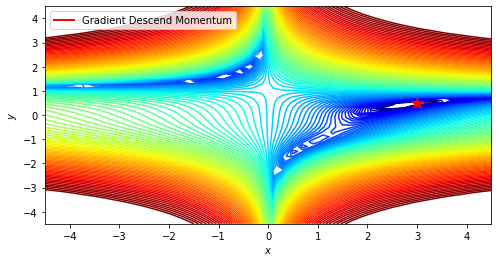

In [10]:
starting_point = np.array([-0.2,0.3])
learning_rate = 0.001
iterations = 40

path = gradient_descend_momentum(x0 = starting_point, learning_rate=learning_rate, num_iter = iterations)
animated = plot_animate2d(path, label = 'Gradient Descend Momentum')
HTML(animated.to_html5_video())

In [0]:
def gradient_descend_nesterov(x0 = np.array([-0.2,0.8]), learning_rate = 0.01, num_iter = 40, momentum = 0.9):
    
    """Momentum gradient Descend
        x0: initial point
        learning_rate: learning rate of gradient descend
        num_iter: number of iterations
        momentum: the strength of momentum
        
    return: return the calcualted gradinets path"""

    func = value_and_grad(lambda args: f(*args))
    # initialize path for gradient descent
    path = [x0]
    momentum_path = [np.array([0,0])]
    
    # main loop
    for i in range(num_iter):
        x1 = x0 - momentum*np.array(momentum_path[i])
        v = learning_rate*np.array([f_x(*x1),f_y(*x1)]) + momentum*np.array(momentum_path[i])
        momentum_path.append(v)
        x0 = x0 - v
        path.append(x0)
        
    return np.array(path).T

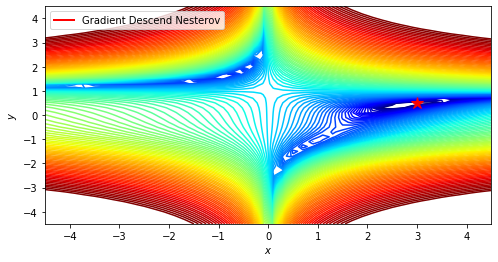

In [12]:
starting_point = np.array([-0.2,0.3])
learning_rate = 0.001
iterations = 40

path = gradient_descend_nesterov(x0 = starting_point, learning_rate=learning_rate, num_iter = iterations)
animated = plot_animate2d(path, label = 'Gradient Descend Nesterov')
HTML(animated.to_html5_video())

In [0]:
def gradient_descend_adagrad(x0 = np.array([-0.2,0.8]), learning_rate = 0.01, num_iter = 40, epsilon = 1e-8):
    
    """Adagrad gradient Descend
        x0: initial point
        learning_rate: learning rate of gradient descend
        num_iter: number of iterations
        epsilon: smoothing parameter, to avoid division by 0
        
    return: return the calcualted gradinets path"""

    func = value_and_grad(lambda args: f(*args))
    # initialize path for gradient descent
    path = [x0]
    
    # main loop
    for i in range(num_iter):
        
        # check that first iteration is close to sdg
        if i == 0:
            grads_square = np.array([0,0])
            grads_denom = np.sqrt(np.array([1,1]) + epsilon)
            
        grads = np.array([f_x(*x0),f_y(*x0)])    
        x0 = x0 - learning_rate*grads/grads_denom
        path.append(x0)
        
        grads_square = grads_square + grads**2
        grads_denom = np.sqrt(grads_square + epsilon)
        
    return np.array(path).T

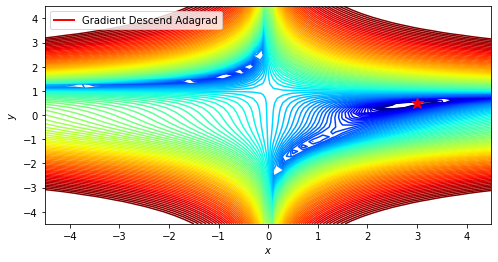

In [0]:
starting_point = np.array([-0.2,0.3])
learning_rate = 0.05
iterations = 40

path = gradient_descend_adagrad(x0 = starting_point, learning_rate=learning_rate, num_iter = iterations)
animated = plot_animate2d(path, label = 'Gradient Descend Adagrad')
HTML(animated.to_html5_video())

In [0]:
def gradient_descend_rmsprop(x0 = np.array([-0.2,0.8]), learning_rate = 0.01,
                             num_iter = 40, epsilon = 1e-8, momentum = 0.9):
    
    """rmsprop gradient Descend
        x0: initial point
        learning_rate: learning rate of gradient descend
        num_iter: number of iterations
        epsilon: smoothing parameter, to avoid division by 0
        mementum: the weight of squared grads vs usual grads
        
    return: return the calcualted gradinets path"""

    func = value_and_grad(lambda args: f(*args))
    # initialize path for gradient descent
    path = [x0]
    
    # main loop
    for i in range(num_iter):
        
        # check that first iteration is close to sdg
        if i == 0:
            grads_square = np.array([0,0])
            grads_denom = np.sqrt(np.array([1,1]) + epsilon)
            
        grads = np.array([f_x(*x0),f_y(*x0)])
        # update with current gradients
        grads_square = momentum*grads_square + (1-momentum)*grads**2
        grads_denom = np.sqrt(grads_square + epsilon)
        x0 = x0 - learning_rate*grads/grads_denom
        path.append(x0)
        
        
    return np.array(path).T

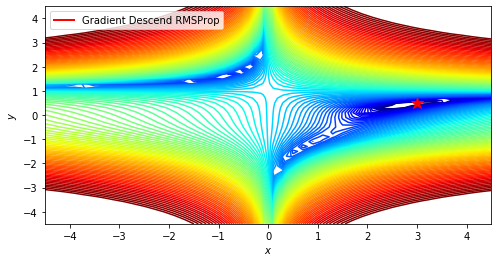

In [0]:
starting_point = np.array([0.5,0.5])
learning_rate = 0.05
iterations = 40

path = gradient_descend_rmsprop(x0 = starting_point, learning_rate=learning_rate, num_iter = iterations)
animated = plot_animate2d(path, label = 'Gradient Descend RMSProp')
HTML(animated.to_html5_video())

In [0]:
def gradient_descend_adam(x0 = np.array([-0.2,0.8]), learning_rate = 0.01,
                             num_iter = 40, epsilon = 1e-8, beta1 = 0.9, beta2 = 0.9):
    
    """Adam gradient Descend
        x0: initial point
        learning_rate: learning rate of gradient descend
        num_iter: number of iterations
        epsilon: smoothing parameter, to avoid division by 0
        beta1: weights for updating moving average of grads
        beta2: weights for updating moving average of grads squared
        
    return: return the calcualted gradinets path"""

    func = value_and_grad(lambda args: f(*args))
    # initialize path for gradient descent
    path = [x0]
    
    # main loop
    for i in range(num_iter):
        
        # check that first iteration is close to sdg
        if i == 0:
            grads_square = np.array([0,0])
            grads_mean = np.array([0,0])
            
        grads = np.array([f_x(*x0),f_y(*x0)]) 
        grads_mean = beta1*grads_mean+(1-beta1)*grads
        grads_square = beta2*(grads_square) + (1-beta2)*grads**2
        
        if i != 0:
            grads_mean = grads_mean/(1-beta1**i)    
            grads_square = grads_square/(1-beta2**i)
            
        grads_denom = np.sqrt(grads_square + epsilon)            
        x0 = x0 - learning_rate*grads_mean/grads_denom
        path.append(x0)
        
    return np.array(path).T

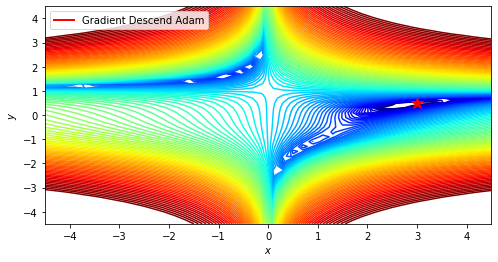

In [0]:
starting_point = np.array([0.5,0.5])
learning_rate = 0.05
iterations = 40

path = gradient_descend_rmsprop(x0 = starting_point, learning_rate=learning_rate, num_iter = iterations)
animated = plot_animate2d(path, label = 'Gradient Descend Adam')
HTML(animated.to_html5_video())

In practice Adam is used mostly. However there are some tricks to make convergence better<br>
1) annealing - schedule learning rate and decrease say per 10 epoch by 2 times <br>
2) use SGD with high learning after Adam has converged to local minima. Get another model save it and again raise learning rate. repeat multiple times and make ensemble of models.